<a href="https://colab.research.google.com/github/maggie8801/EDA/blob/main/item2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1/4課程

In [60]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-01-04 06:47:51--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.218.139, 172.217.218.102, 172.217.218.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6ccv4f9r71n60rrltqrfou330uf68ua/1641278850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-01-04 06:47:52--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v6ccv4f9r71n60rrltqrfou330uf68ua/1641278850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.79.132, 2a00:1450:4013:c05::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|17

### Load data

In [61]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x:'%.0f'% x)

data = pd.read_csv('/content/drive/MyDrive/Jourdeness/data3_project.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8,2019-01-01,1259,9100002488768,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8,2019-01-01,839,9100002556566,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8,2019-01-01,839,9100002556566,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8,2019-01-01,-1501,9100002556566,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8,2019-01-01,672,9100002582077,南區,2018-12-04,2018-12-04
...,...,...,...,...,...,...,...,...,...,...
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16,2020-12-31,2946,9100000595826,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8,2020-12-31,309,9100003028369,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8,2020-12-31,1094,9100003028369,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16,2020-12-31,165,9100003028369,竹區,2020-12-08,2020-11-26


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [63]:
data.isnull().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [64]:
#去CustomerID空值
data.drop(data[data['CustomerID'].isnull()].index, inplace=True)

In [65]:
data.isnull().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID           False
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [66]:
#title
#聚合得到userID, itemID列表
df_group = data.groupby(['CustomerID'])['Description'].apply(lambda x: ' '.join([str(m) for m in x])).reset_index()
df_group.head()

,CustomerID,Description
0,9100000000061,24H賦活液100ml 玫瑰晶萃瞬效霜30ml 超防禦UV潤色妝前乳30ml 旗艦無壓力頭S...
1,9100000000085,五日激光煥顏課程單堂 膠原晶球水導膜課程單堂 苦杏仁酸靚顏慕絲300ml 旗艦全背順氣活力S...
2,9100000000092,超導水網瞬效面膜26ml*6包 24小時黃金璀璨賦活液40ml 玫瑰晶萃露15ml 玫瑰晶萃...
3,9100000000115,玫瑰晶萃水面膜10ml*10支 DC原生龍血素30ml 阿甘髮膜1000ml 阿甘洗髮精10...
4,9100000000170,旗艦全背順氣活力SPA課程2.0單堂 世界花園旅行組(黑)


In [67]:
df_group.to_csv('/content/drive/MyDrive/Jourdeness/itemlens_uid_itemids.csv', index=False)

### Use Pyspark train item2vec

In [68]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u292-b10-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u292-b10-0ubuntu1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?


In [69]:
!pip install pyspark
!pip install findspark

In [70]:
#初始化spark
import findspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('PySpark Item2vec').getOrCreate()

#sc = spark.sparkContext

In [71]:
df = spark.read.csv('/content/drive/MyDrive/Jourdeness/itemlens_uid_itemids.csv', header=True) #印出表頭
df.show(5)

+---------------+------------------------------------+
|     CustomerID|                         Description|
+---------------+------------------------------------+
|9100000000061.0|        24H賦活液100ml 玫瑰晶萃瞬...|
|9100000000085.0|五日激光煥顏課程單堂 膠原晶球水導...|
|9100000000092.0|       超導水網瞬效面膜26ml*6包 2...|
|9100000000115.0|        玫瑰晶萃水面膜10ml*10支 D...|
|9100000000170.0|     旗艦全背順氣活力SPA課程2.0單...|
+---------------+------------------------------------+
only showing top 5 rows



In [72]:
from pyspark.sql import functions as F 
from pyspark.sql import types as T

#把字串格式轉換成list形式
df = df.withColumn('Description', F.split(df.Description, ' '))

### 實現word(item)2vec的訓練與轉換

In [73]:
#https://spark.apache.org/docs/2.4.6/ml-features.html#word2vec
from pyspark.ml.feature import Word2Vec

word2vec = Word2Vec(vectorSize=5, minCount=0, inputCol='Description', outputCol='Stock_2vec') #outputcol是自己命名的
model = word2vec.fit(df)

In [74]:
#不計算每個user的embedding，而是計算item的embedding
model.getVectors().show(3, truncate=False)

+------------------------------+----------------------------------------------------------------------------------------------------------+
|word                          |vector                                                                                                    |
+------------------------------+----------------------------------------------------------------------------------------------------------+
|激活更新護理_臉部溫灸單堂     |[-0.5467788577079773,0.2601988613605499,0.8288102149963379,1.1234891414642334,-0.8890355825424194]        |
|2017MOMO購物網背部舒壓樂活課程|[-0.004281507804989815,0.17804497480392456,-0.019841274246573448,0.00418898044154048,-0.07542011141777039]|
|(3.0                          |[0.8680474162101746,-1.1018157005310059,0.13090473413467407,1.4012373685836792,0.4883410632610321]        |
+------------------------------+----------------------------------------------------------------------------------------------------------+
only showing top 3 rows



/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [75]:
model.getVectors().select('word','vector').toPandas().to_csv('/content/drive/MyDrive/Jourdeness/stocklens_stock_embedding.csv', index=False)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [76]:
model.getVectors().show(truncate=False)
#可看出是一個五維資料

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+----------------------------------------+-----------------------------------------------------------------------------------------------------------+
|word                                    |vector                                                                                                     |
+----------------------------------------+-----------------------------------------------------------------------------------------------------------+
|激活更新護理_臉部溫灸單堂               |[-0.5467788577079773,0.2601988613605499,0.8288102149963379,1.1234891414642334,-0.8890355825424194]         |
|2017MOMO購物網背部舒壓樂活課程          |[-0.004281507804989815,0.17804497480392456,-0.019841274246573448,0.00418898044154048,-0.07542011141777039] |
|(3.0                                    |[0.8680474162101746,-1.1018157005310059,0.13090473413467407,1.4012373685836792,0.4883410632610321]         |
|粹白茉莉柔嫩護手霜30g                   |[-0.1207704246044159,0.09925973415374756,0.36988067626953125,-0.007277647033333778,-

In [77]:
#轉成numpy型態
word = model.getVectors().select('word')
word = np.array(word.select('word').collect())
word = word.reshape(-1) #不管幾維的資料都轉成一維

item_v = model.getVectors().select('vector')
item_v = np.array(item_v.select('vector').collect())

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [78]:
word.shape #一維

(866,)

In [79]:
item_v.shape #三維

(866, 1, 5)

In [80]:
item_v

array([[[-0.54677886,  0.26019886,  0.82881021,  1.12348914,
         -0.88903558]],

       [[-0.00428151,  0.17804497, -0.01984127,  0.00418898,
         -0.07542011]],

       [[ 0.86804742, -1.1018157 ,  0.13090473,  1.40123737,
          0.48834106]],

       ...,

       [[-0.00733371,  0.58987707,  0.11382236,  0.20456986,
         -0.11222737]],

       [[-0.2647742 ,  0.4931716 ,  0.79442358, -0.06473284,
          0.05690743]],

       [[-0.05112723,  0.02194416,  0.05969153, -0.04350285,
         -0.06132839]]])

In [81]:
item_v = item_v.reshape(866,5) #因為後面做t-SNE視覺化只限定用二維資料

### t-SNE視覺化

In [82]:
from sklearn import manifold
#t-SNE初始化
x_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(item_v)

#Data Visualization
x_min, x_max = x_tsne.min(0), x_tsne.max(0)
x_norm = (x_tsne-x_min)/(x_max-x_min) #Normalization

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 866 samples in 0.001s...
[t-SNE] Computed neighbors for 866 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 866 / 866
[t-SNE] Mean sigma: 0.132396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.008434
[t-SNE] KL divergence after 1000 iterations: 0.684818


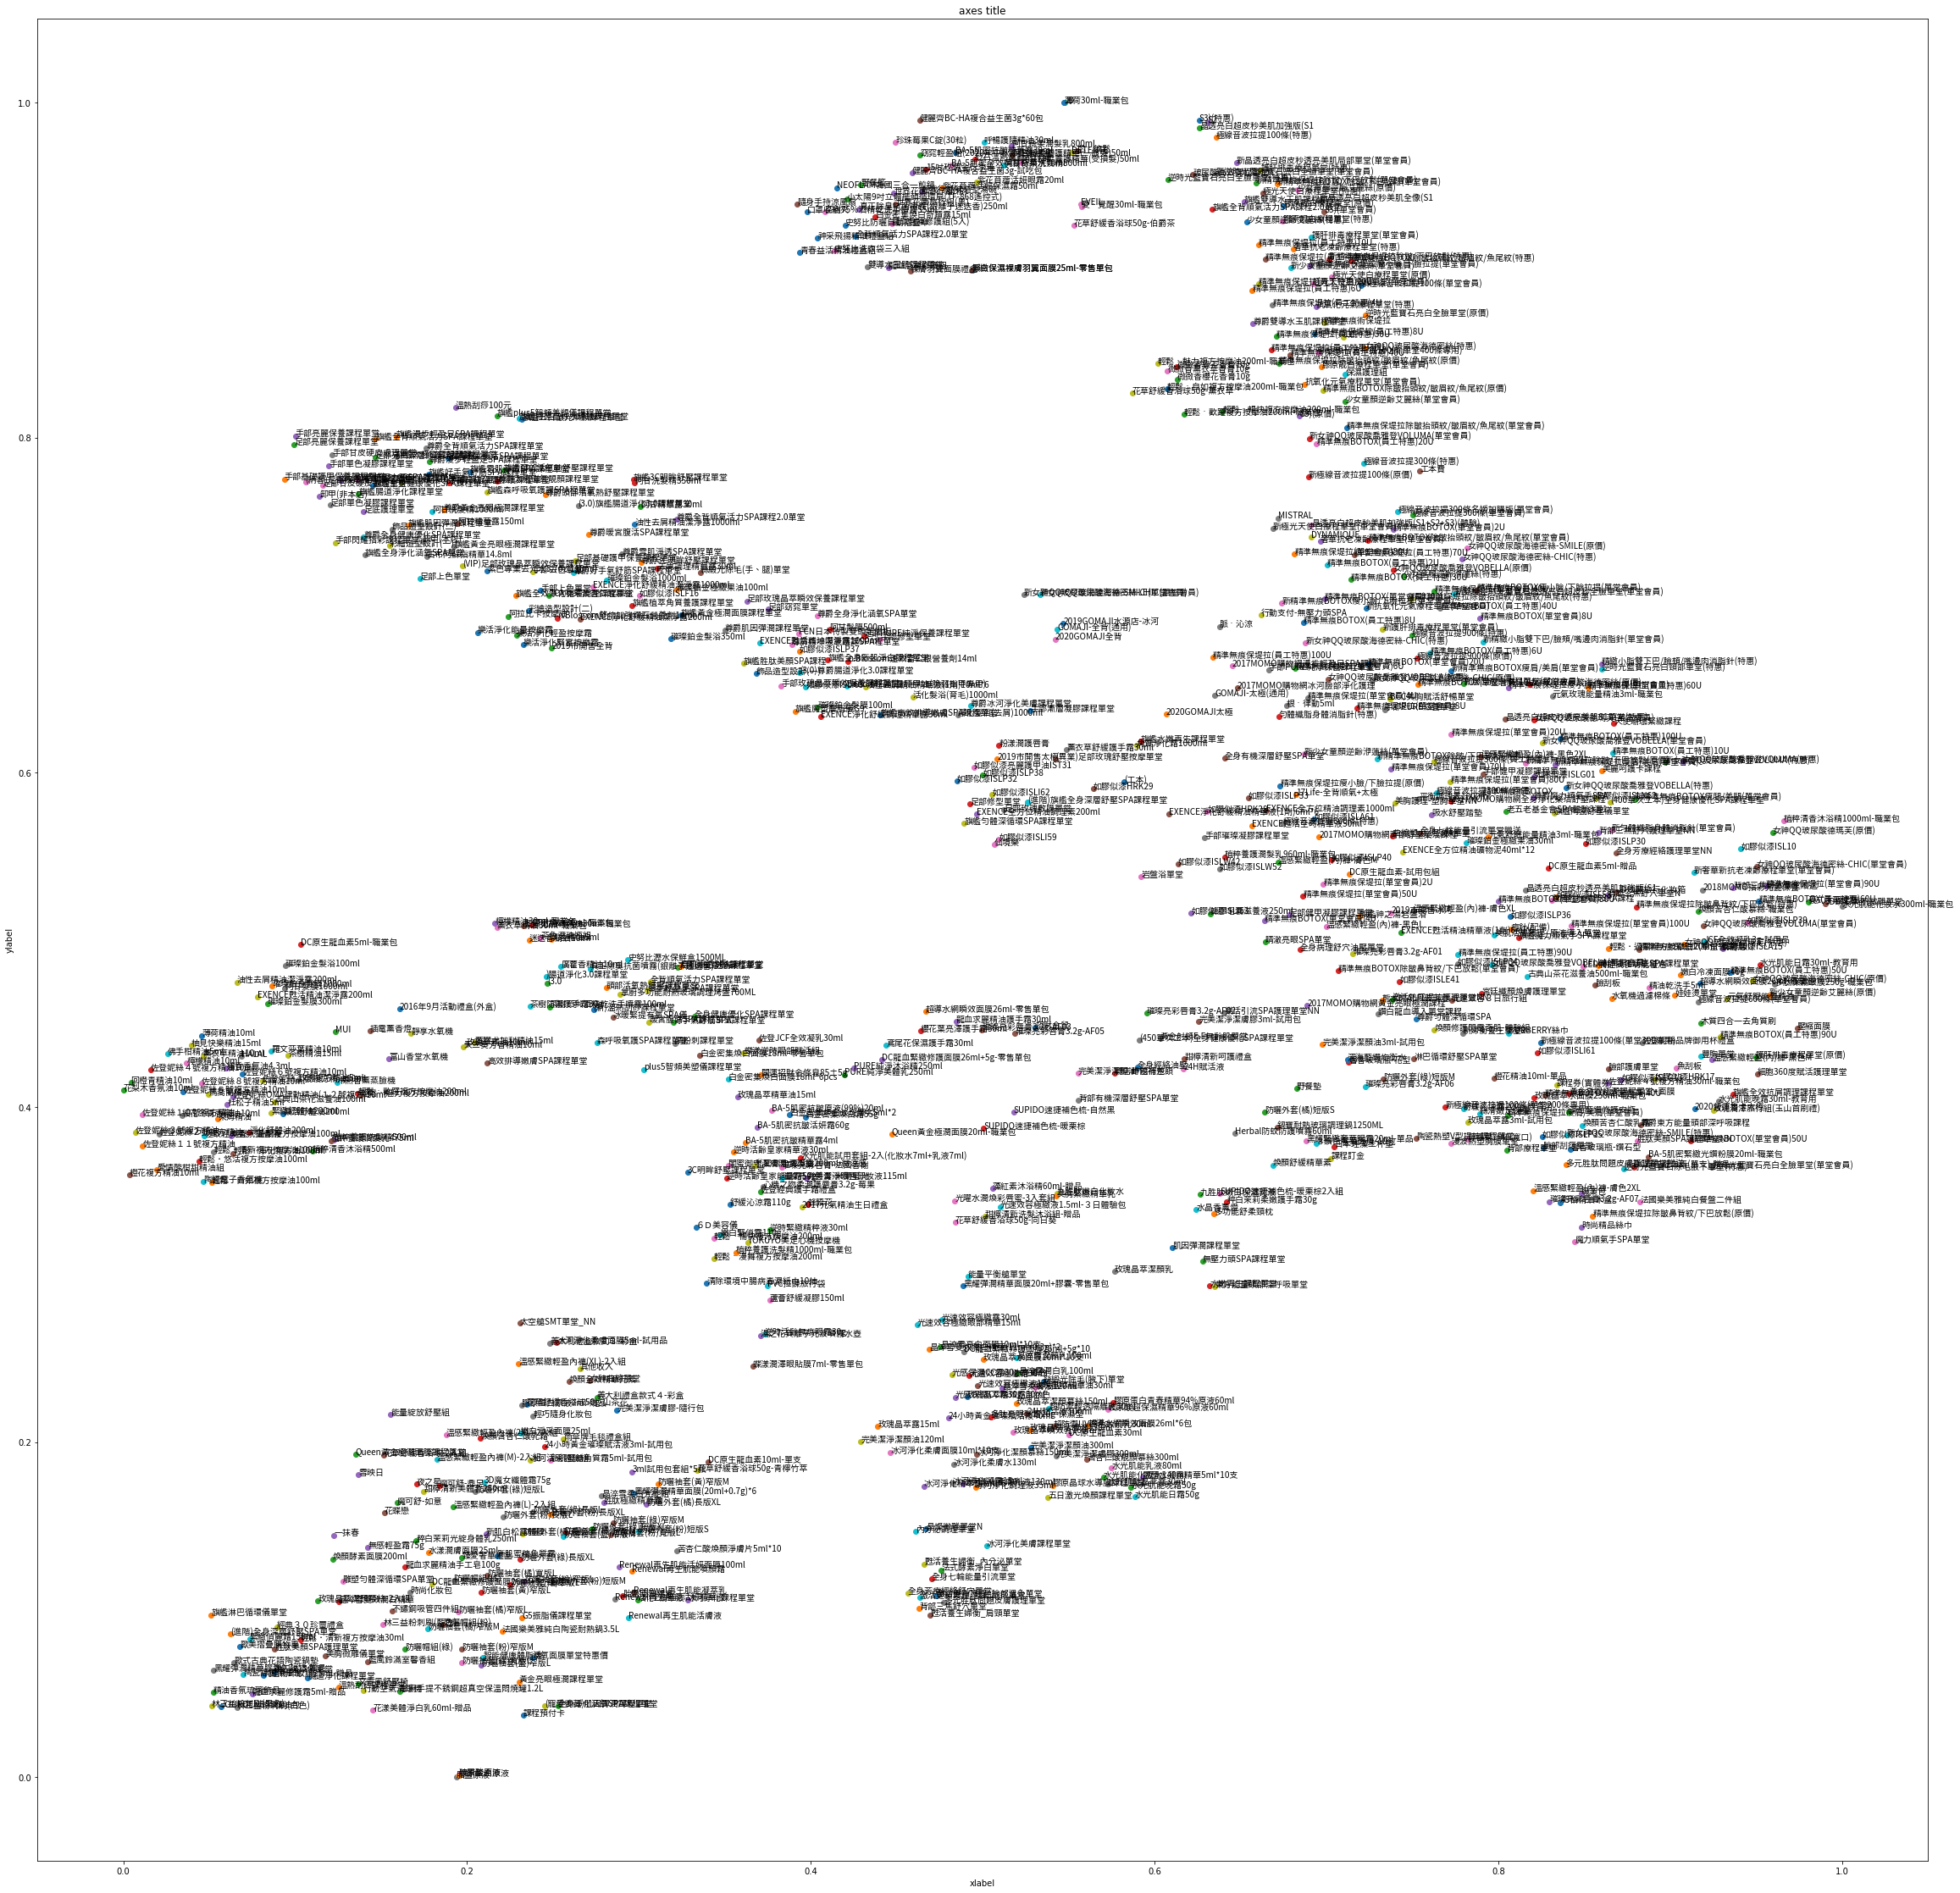

In [83]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot()
for i in range(x_norm.shape[0]):
  ax.scatter(x_norm[i,0], x_norm[i,1])
  ax.annotate(word[i], (x_norm[i,0], x_norm[i,1]), fontproperties=myfont)

ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

plt.show()